In [1]:
! pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840629 sha256=b3401a5c3c7516fecceaeadeef7b66935c5b1c9b68b1b2be06d911bfa1d00df7
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf

In [3]:
spark = SparkSession.builder.appName('Pyspark.Sql').getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/10/20 10:05:05 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
spark

In [5]:
data = [('Adam', 'Miller', 32), ('Mike', 'Johnson', 23), ('David', 'White', 34), ('David', 'Tyce', 32)]

df = spark.createDataFrame(data, ['FirstName','LastName', 'Age'])

df.createOrReplaceTempView('people')

In [6]:
spark.sql('SELECT * FROM people').show()

+---------+--------+---+
|FirstName|LastName|Age|
+---------+--------+---+
|     Adam|  Miller| 32|
|     Mike| Johnson| 23|
|    David|   White| 34|
|    David|    Tyce| 32|
+---------+--------+---+



**AGE**

In [7]:
spark.sql('SELECT age from people').show()

+---+
|age|
+---+
| 32|
| 23|
| 34|
| 32|
+---+



 **Frist Name**

In [8]:
spark.sql('select FirstName from people').show()

+---------+
|FirstName|
+---------+
|     Adam|
|     Mike|
|    David|
|    David|
+---------+



 **Last Name**

In [9]:
spark.sql('select LastName from people').show()

+--------+
|LastName|
+--------+
|  Miller|
| Johnson|
|   White|
|    Tyce|
+--------+



**firstname where age is greater than 30**

In [10]:
spark.sql('select FirstName from people where Age > 30' ).show()

+---------+
|FirstName|
+---------+
|     Adam|
|    David|
|    David|
+---------+



**LastName of people where Age is greater than 25**

In [11]:
spark.sql('Select LastName from people where age < 25').show()

+--------+
|LastName|
+--------+
| Johnson|
+--------+



**firstname where age is less than 30**

In [12]:
spark.sql('select firstname from people where age < 30').show()

+---------+
|firstname|
+---------+
|     Mike|
+---------+



**age where age is greater than 30**

In [13]:
spark.sql('select age from people where age >30').show()

+---+
|age|
+---+
| 32|
| 34|
| 32|
+---+



**firstname where firstname start with D**

In [14]:
spark.sql("select firstname from people where FirstName like 'D%'").show()

+---------+
|firstname|
+---------+
|    David|
|    David|
+---------+



**firstname where firstname or lastname start with D**

In [15]:
spark.sql("select FirstName from people where FirstName like 'D%' or LastName like 'D%'").show()

+---------+
|FirstName|
+---------+
|    David|
|    David|
+---------+



**firstname where lastname end with e**

In [16]:
spark.sql("select firstname from people where lastname like '%e'").show()

+---------+
|firstname|
+---------+
|    David|
|    David|
+---------+



**sum of all the ages**

In [17]:
spark.sql('select sum(age) from people').show()

+--------+
|sum(age)|
+--------+
|     121|
+--------+



**find min age where firstname start with D**

In [18]:
spark.sql("select min(age) from people where firstname like 'D%'").show()

+--------+
|min(age)|
+--------+
|      32|
+--------+



**max age where lastname end with D**

In [19]:
spark.sql("select max(age) from people where lastname like '%D'").show()

+--------+
|max(age)|
+--------+
|    NULL|
+--------+



# **Linear Regression**

In [20]:
from pyspark.ml.regression import LinearRegression 
from pyspark.ml.feature import VectorAssembler as va

In [21]:
df = spark.read.csv("/kaggle/input/predict-salary-csv/Salary.csv", header = True, inferSchema = True)
df = df.toDF('Experience', 'Salary')


In [22]:
df.show()

+----------+------+
|Experience|Salary|
+----------+------+
|       1.1| 39343|
|       1.3| 46205|
|       1.5| 37731|
|       2.0| 43525|
|       2.2| 39891|
|       2.9| 56642|
|       3.0| 60150|
|       3.2| 54445|
|       3.2| 64445|
|       3.7| 57189|
|       3.9| 63218|
|       4.0| 55794|
|       4.0| 56957|
|       4.1| 57081|
|       4.5| 61111|
|       4.9| 67938|
|       5.1| 66029|
|       5.3| 83088|
|       5.9| 81363|
|       6.0| 93940|
+----------+------+
only showing top 20 rows



In [23]:
vac_assembler = va(inputCols = ['Experience'], outputCol = 'Features')

In [24]:
vac_assembler

VectorAssembler_81b80c21251e

In [25]:
dataframe = vac_assembler.transform(df)

In [26]:
dataframe.show()

+----------+------+--------+
|Experience|Salary|Features|
+----------+------+--------+
|       1.1| 39343|   [1.1]|
|       1.3| 46205|   [1.3]|
|       1.5| 37731|   [1.5]|
|       2.0| 43525|   [2.0]|
|       2.2| 39891|   [2.2]|
|       2.9| 56642|   [2.9]|
|       3.0| 60150|   [3.0]|
|       3.2| 54445|   [3.2]|
|       3.2| 64445|   [3.2]|
|       3.7| 57189|   [3.7]|
|       3.9| 63218|   [3.9]|
|       4.0| 55794|   [4.0]|
|       4.0| 56957|   [4.0]|
|       4.1| 57081|   [4.1]|
|       4.5| 61111|   [4.5]|
|       4.9| 67938|   [4.9]|
|       5.1| 66029|   [5.1]|
|       5.3| 83088|   [5.3]|
|       5.9| 81363|   [5.9]|
|       6.0| 93940|   [6.0]|
+----------+------+--------+
only showing top 20 rows



In [27]:
lr = LinearRegression(featuresCol = 'Features', labelCol = 'Salary')

In [28]:
lr_model = lr.fit(dataframe)

24/10/20 10:05:32 WARN Instrumentation: [1d198c16] regParam is zero, which might cause numerical instability and overfitting.
24/10/20 10:05:33 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/10/20 10:05:33 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


In [29]:
print('Coefficient', lr_model.coefficients)
print('Intercept', lr_model.intercept)

Coefficient [8731.941047062477]
Intercept 28859.52619453159


# **Logistic Regression**

In [30]:
from pyspark.ml.classification import LogisticRegression

In [31]:
dataframe.show()

+----------+------+--------+
|Experience|Salary|Features|
+----------+------+--------+
|       1.1| 39343|   [1.1]|
|       1.3| 46205|   [1.3]|
|       1.5| 37731|   [1.5]|
|       2.0| 43525|   [2.0]|
|       2.2| 39891|   [2.2]|
|       2.9| 56642|   [2.9]|
|       3.0| 60150|   [3.0]|
|       3.2| 54445|   [3.2]|
|       3.2| 64445|   [3.2]|
|       3.7| 57189|   [3.7]|
|       3.9| 63218|   [3.9]|
|       4.0| 55794|   [4.0]|
|       4.0| 56957|   [4.0]|
|       4.1| 57081|   [4.1]|
|       4.5| 61111|   [4.5]|
|       4.9| 67938|   [4.9]|
|       5.1| 66029|   [5.1]|
|       5.3| 83088|   [5.3]|
|       5.9| 81363|   [5.9]|
|       6.0| 93940|   [6.0]|
+----------+------+--------+
only showing top 20 rows



In [32]:
logistic_regression = LogisticRegression(featuresCol = 'Features', labelCol = 'Salary')

In [33]:
logistic_model = logistic_regression.fit(dataframe)

In [34]:
intercepts = logistic_model.interceptVector
print('Intercepts:')
print('Min:', intercepts.min)
print('Max:', intercepts.max)
print('Mean:', intercepts.mean)


Intercepts:
Min: <built-in method min of numpy.ndarray object at 0x7cef11e08a50>
Max: <built-in method max of numpy.ndarray object at 0x7cef11e08a50>
Mean: <built-in method mean of numpy.ndarray object at 0x7cef11e08a50>


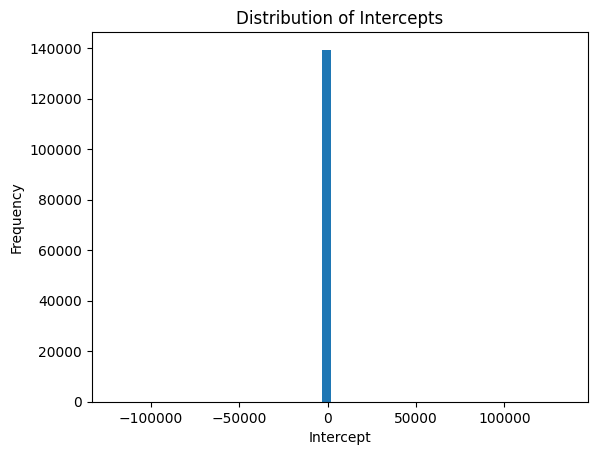

In [35]:
import matplotlib.pyplot as plt

intercepts = logistic_model.interceptVector
plt.hist(intercepts.toArray(), bins=50)
plt.xlabel('Intercept')
plt.ylabel('Frequency')
plt.title('Distribution of Intercepts')
plt.show()

# **K-mean Clustering**

In [36]:
dataframe.show()

+----------+------+--------+
|Experience|Salary|Features|
+----------+------+--------+
|       1.1| 39343|   [1.1]|
|       1.3| 46205|   [1.3]|
|       1.5| 37731|   [1.5]|
|       2.0| 43525|   [2.0]|
|       2.2| 39891|   [2.2]|
|       2.9| 56642|   [2.9]|
|       3.0| 60150|   [3.0]|
|       3.2| 54445|   [3.2]|
|       3.2| 64445|   [3.2]|
|       3.7| 57189|   [3.7]|
|       3.9| 63218|   [3.9]|
|       4.0| 55794|   [4.0]|
|       4.0| 56957|   [4.0]|
|       4.1| 57081|   [4.1]|
|       4.5| 61111|   [4.5]|
|       4.9| 67938|   [4.9]|
|       5.1| 66029|   [5.1]|
|       5.3| 83088|   [5.3]|
|       5.9| 81363|   [5.9]|
|       6.0| 93940|   [6.0]|
+----------+------+--------+
only showing top 20 rows



In [37]:
from pyspark.ml.clustering import KMeans

In [38]:
kmeans = KMeans().setK(2).setSeed(1)

In [39]:
dataframe = dataframe.withColumnRenamed('Features', 'features')

In [40]:
dataframe.show()

+----------+------+--------+
|Experience|Salary|features|
+----------+------+--------+
|       1.1| 39343|   [1.1]|
|       1.3| 46205|   [1.3]|
|       1.5| 37731|   [1.5]|
|       2.0| 43525|   [2.0]|
|       2.2| 39891|   [2.2]|
|       2.9| 56642|   [2.9]|
|       3.0| 60150|   [3.0]|
|       3.2| 54445|   [3.2]|
|       3.2| 64445|   [3.2]|
|       3.7| 57189|   [3.7]|
|       3.9| 63218|   [3.9]|
|       4.0| 55794|   [4.0]|
|       4.0| 56957|   [4.0]|
|       4.1| 57081|   [4.1]|
|       4.5| 61111|   [4.5]|
|       4.9| 67938|   [4.9]|
|       5.1| 66029|   [5.1]|
|       5.3| 83088|   [5.3]|
|       5.9| 81363|   [5.9]|
|       6.0| 93940|   [6.0]|
+----------+------+--------+
only showing top 20 rows



In [41]:
kmeans_model = kmeans.fit(dataframe)

In [42]:
centers = kmeans_model.clusterCenters()

In [43]:
print('Cluster Centers: ', centers)

Cluster Centers:  [array([3.89545455]), array([10.39230769])]


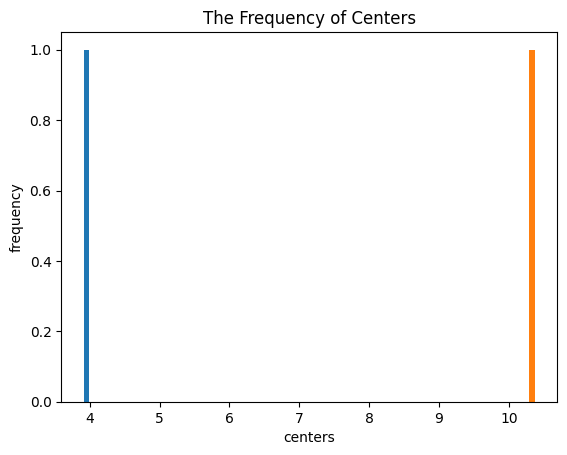

In [44]:
plt.hist(centers, bins = 32)
plt.xlabel('centers')
plt.ylabel('frequency')
plt.title('The Frequency of Centers')
plt.show()